In [1]:
import pandas as pd
import pydot as py
from itertools import product

var_mapping = {
                'feed_air/comp_1.P_1' : 'P1',
                'comp_1/v_6.F_7' : 'F7',
                'comp_1/v_6.P_2' : 'P2',
                'react_1.T_reg' : 'T_reg',
                'react_1.L_sp' : 'L_sp',
                'react_1.P_6' : 'P6',
                'react_1/v_7.F_sg' : 'F_sg',
                'react_1/v_7.T_cyc' : 'T_cyc',
                'v_7/prod_stack.X_co' : 'C_cosg',
                'v_7/prod_stack.X_co2' : 'C_co2sg',
                'react_1/v_2.F_rgc' : 'F_rgc',
                'react_2.T_r' : 'T_r',
                'react_2.P_4' : 'P4',
                'react_2/v_3.F_sc' : 'F_sc',
                'feed_feedstream/furn_1.F_3' : 'F3',
                'feed_feedstream/furn_1.T_1' : 'T1',
                'feed_fuel/v_1.F_5' : 'F5',
                'furn_1.T_3' : 'T3',
                'furn_1/react_2.T_2' : 'T2',
                'distil_1.T_20' : 'T_20',
                'distil_1.T_10' : 'T_10',
                'distil_1.T_fra' : 'T_fra',
                'distil_1.P_5' : 'P5',
                'v_11/prod_lightoil.F_lco' : 'F_LCO',
                'v_10/prod_heavynaptha.F_hn' : 'F_HN',
                'v_9/prod_lightnaptha.F_ln' : 'F_LN',
                'v_8/distil_1.F_reflux' : 'F_Reflux',
                'comp_2/prod_lpg.F_lpg' : 'F_LPG',
                'react2_1/prod_slurry.F_slurry' : 'F_Slurry',
                'ACAB' : 'ACAB',
                'AWGC' : 'AWGC',
                'Pos_1' : 'V1',
                'Pos_2' : 'V2',
                'Pos_3' : 'V3',
                'Pos_4' : 'V4',
                'Pos_6' : 'V6',
                'Pos_7' : 'V7',
                'Pos_8' : 'V8',
                'Pos_9' : 'V9',
                'Pos_10' : 'V10',
                'Pos_11' : 'V11',
                }


data_files = ['NOC_stableFeedFlow_outputs.csv',
              'NOC_varyingFeedFlow_outputs.csv',
              'CAB_valveLeak_outputs.csv',
              'condEff_decrease_outputs.csv',
              'deltaP_increase_outputs.csv',
              'Fhn_sensorDrift_outputs.csv',
              'UAf_decrease_outputs.csv']
file_ind = 1
data = pd.read_csv(rf'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Data\{data_files[file_ind]}')
additional_vars = ['Time', 'T_atm', 'Fair', 'FV11']
data = data.drop(columns = additional_vars)


from ground_truth import ground_truth
truth_graph_obj = ground_truth()
truth_graph_obj.ctrl(False, False)
truth_graph = {'nodes' : truth_graph_obj.nodes,
               'edges' : truth_graph_obj.edges}


from analyse_graphs import analyse_graphs
from handle_cycles import handle_cycles
from test_run_fges import run_fges

c:\Users\fcb19bd\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
unit_stores = {}
unit_stores['cab'] = analyse_graphs.read_data_store(r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\cab.xlsx')
unit_stores['wgc'] = analyse_graphs.read_data_store(r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\wgc.xlsx')
unit_stores['reg'] = analyse_graphs.read_data_store(r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\regenerator.xlsx')
unit_stores['react'] = analyse_graphs.read_data_store(r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\reactor.xlsx')
unit_stores['frac'] = analyse_graphs.read_data_store(r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\fractionator.xlsx')
unit_stores['furn'] = analyse_graphs.read_data_store(r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\furnace.xlsx')

In [3]:
top_three_score = {}
top_three_gt = {}
for unit, itr_data in unit_stores.items():

    top_three = analyse_graphs.find_top_three_graphs(itr_data)
    top_three_score[unit] = top_three

    # top_three, _, _, _ = analyse_graphs.find_top_three_closest_to_gt(itr_data, truth_graph)
    # top_three_closest = []
    # for itr_place in top_three:

    #     top_three_closest.append([itr_data[itr_graph] for itr_graph in itr_place])
    # top_three_gt[unit] = top_three_closest



## Compile graphs 

In [8]:
best_graph_scores = analyse_graphs.compile_graphs(top_three_score, data)
best_graph_scores = analyse_graphs.score_whole_graphs(best_graph_scores, data)

c:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\tools.py:137: SyntaxWarning: invalid escape sequence '\{'
  graph1_path = f'{set1_path}\{graph1_file}.xlsx'
c:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\tools.py:139: SyntaxWarning: invalid escape sequence '\{'
  graph2_path = f'{set2_path}\{graph2_file}.xlsx'


KeyboardInterrupt: 

In [ ]:
scores = [graph['score'] for graph in best_graph_scores]
ordered_scores = sorted(zip(scores, best_graph_scores), key=lambda x: x[0], reverse=True)
best_graph_scores = [itr[1] for itr in ordered_scores]

for itr_graph in best_graph_scores:

    print(itr_graph['combination'])
    print(itr_graph['score'])
    print('************')

top_ten = best_graph_scores[:32]
analyse_graphs.write_excel_whole_graph(top_ten, r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\top_ten.xlsx')

(0, 0, 0, 0, 0, 0)
434117.7877539898
************
(0, 0, 0, 0, 0, 1)
434102.70512327214
************
(0, 0, 1, 0, 0, 0)
434095.01869520417
************
(0, 0, 1, 0, 0, 1)
434079.9360644865
************
(0, 1, 0, 0, 0, 0)
433462.322049774
************
(0, 1, 0, 0, 0, 1)
433447.23941905634
************
(0, 1, 1, 0, 0, 0)
433439.55299098836
************
(0, 1, 1, 0, 0, 1)
433424.4703602707
************
(0, 0, 0, 0, 1, 0)
432363.0031752548
************
(0, 0, 0, 0, 1, 1)
432347.92054453713
************
(0, 0, 1, 0, 1, 0)
432340.23411646916
************
(0, 0, 1, 0, 1, 1)
432325.1514857515
************
(0, 1, 0, 0, 1, 0)
431707.537471039
************
(0, 1, 0, 0, 1, 1)
431692.4548403213
************
(0, 1, 1, 0, 1, 0)
431684.76841225335
************
(0, 1, 1, 0, 1, 1)
431669.6857815357
************
(0, 0, 0, 1, 0, 0)
430335.5696067811
************
(0, 0, 0, 1, 0, 1)
430320.48697606346
************
(0, 0, 1, 1, 0, 0)
430312.8005479955
************
(0, 0, 1, 1, 0, 1)
430297.7179172778
*******

## Cross unit links 

In [ ]:
forbid_edges = analyse_graphs.forbid_within_units([])
forbid_edges =  analyse_graphs.forbid_units(forbid_edges)
forbid_edges = analyse_graphs.forbid_valves(forbid_edges)

In [ ]:
data_scores = analyse_graphs.data_only(top_ten, data, forbid_edges)
analyse_graphs.write_cross_unit_graph(data_scores, 'data mode', r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\data_mode.xlsx')

# for itr in data_scores:

#     print(itr['combination'])
#     print(itr['data mode'][0])
#     print(itr['data mode'][1])
#     print('***')

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
(0, 0, 0, 0, 0, 0)
[('F3', 'T_reg'), ('F3', 'T_cyc'), ('T_cyc-T_reg', 'F3'), ('F3', 'C_co'), ('F3', 'F_lco'), ('V7', 'T_r'), ('T_r', 'F_hn'), ('T_r', 'T_10'), ('T_r', 'T_20'), ('T_reg', 'F_hn'), ('L_sp', 'T_20'), ('ACAB', 'T_cyc'), ('T_cyc-T_reg', 'C_o2'), ('T_cyc-T_reg', 'V4'), ('T_cyc-T_reg', 'V7'), ('T_cyc-T_reg', 'V3'), ('T_cyc-T_reg', 'V1'), ('T_cyc-T_reg', 'V2'), ('F7', 'T_cyc-T_reg'), ('T_cyc-T_reg', 'V8'), ('T_cyc-T_reg', 'V11'), ('V6', 'F_ln'), ('V6', 'F_hn'), ('V6', 'F_slurry'), ('V6', 'F_reflux'), ('V6', 'T_10'), ('V7', 'F_ln'), ('V7', 'F_slurry'), ('V7', 'F_reflux'), ('V3', 'F_ln'), ('V2', 'AWGC'), ('V2', 'F_lpg'), ('V2', 'F_lco'), ('V2', 'F_slurry'), ('V2', 'T_10'), ('F_rgc', 'F_lpg'), ('F_rgc', 'F_slurry'), ('F_rgc', 'T_10'), ('ACAB', 'AWGC'), ('ACAB', 'F_lpg'), ('ACAB', 'F_ln'), ('ACAB', 'F_hn'), ('ACAB', 'F_slurry'), ('ACAB', 'F_reflux'), ('ACAB', 'T_10'), ('F_ln', 'AWGC'), (

In [ ]:
data_scores = analyse_graphs.cluster_mode(data_scores, data, forbid_edges)
analyse_graphs.write_cross_unit_graph(data_scores, 'cluster mode', r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\cluster_mode.xlsx')

# for itr in data_scores:

#     print(itr['combination'])
#     print(itr['cluster mode'][0])
#     print(itr['cluster mode'][1])
#     print('***')

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
(0, 0, 0, 0, 0, 0)
[('F3', 'T_reg'), ('F3', 'T_cyc'), ('T_cyc-T_reg', 'F3'), ('F3', 'C_co'), ('F3', 'F_lco'), ('V7', 'T_r'), ('T_r', 'F_hn'), ('T_r', 'T_10'), ('T_reg', 'F_hn'), ('L_sp', 'T_20'), ('ACAB', 'T_cyc'), ('T_cyc-T_reg', 'C_o2'), ('T_cyc-T_reg', 'V4'), ('T_cyc-T_reg', 'V7'), ('T_cyc-T_reg', 'V3'), ('T_cyc-T_reg', 'V1'), ('T_cyc-T_reg', 'V2'), ('F7', 'T_cyc-T_reg'), ('T_cyc-T_reg', 'V8'), ('T_cyc-T_reg', 'V11'), ('V6', 'F_ln'), ('V6', 'F_hn'), ('V6', 'F_slurry'), ('V6', 'F_reflux'), ('V6', 'T_10'), ('V7', 'F_ln'), ('V7', 'F_slurry'), ('V7', 'F_reflux'), ('V3', 'F_ln'), ('V2', 'AWGC'), ('V2', 'F_lpg'), ('V2', 'F_lco'), ('V2', 'F_slurry'), ('V2', 'T_10'), ('F_rgc', 'F_lpg'), ('F_rgc', 'F_slurry'), ('F_rgc', 'T_10'), ('ACAB', 'AWGC'), ('ACAB', 'F_lpg'), ('ACAB', 'F_ln'), ('ACAB', 'F_hn'), ('ACAB', 'F_slurry'), ('ACAB', 'F_reflux'), ('ACAB', 'T_10'), ('F_ln', 'AWGC'), ('T_fra', 'AWGC'),

In [ ]:
# rigorous_scores = analyse_graphs.rigorous_mode(best_graph_scores, data, forbid_edges)


## Compiled knowledge graphs 

In [4]:
best_graph_scores = analyse_graphs.compile_knowledge_graphs(top_three_score, data)
top_ten = best_graph_scores[:32]

forbid_edges =  analyse_graphs.forbid_units([])
forbid_edges = analyse_graphs.forbid_valves(forbid_edges)
forbid_edges = analyse_graphs.forbid_unit_edges(forbid_edges)

In [5]:
data_scores = analyse_graphs.data_only(top_ten, data, forbid_edges)
analyse_graphs.write_cross_unit_graph(data_scores, 'data mode', r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\compiled_knowledge_data_mode.xlsx')

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [6]:
data_scores = analyse_graphs.cluster_mode(top_ten, data, forbid_edges)
analyse_graphs.write_cross_unit_graph(data_scores, 'cluster mode', r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\compiled_knowledge_cluster_mode.xlsx')

[]
[]
[]
[]
[]
[]
[]
[]


KeyboardInterrupt: 

## Data only

In [ ]:
graph = {}
graph['nodes'], graph['edges'], score = analyse_graphs.run_fges_no_knowledge(forbid_edges)
analyse_graphs.write_no_knowledge_graph(graph, score, r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\no_knowledge.xlsx')

## Get gt similarity score

In [1]:

from analyse_graphs import analyse_graphs

data_mode = analyse_graphs.read_cross_unit_graph(r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\data_mode.xlsx') 
cluster_mode = analyse_graphs.read_cross_unit_graph(r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\cluster_mode.xlsx') 
compile_kn_data_mode = analyse_graphs.read_cross_unit_graph(r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\compiled_knowledge_data_mode.xlsx') 
compile_kn_cluster_mode = analyse_graphs.read_cross_unit_graph(r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\compiled_knowledge_cluster_mode.xlsx') 

modes = {'data' : data_mode,
         'cluster' : cluster_mode}


c:\Users\fcb19bd\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Analyse results

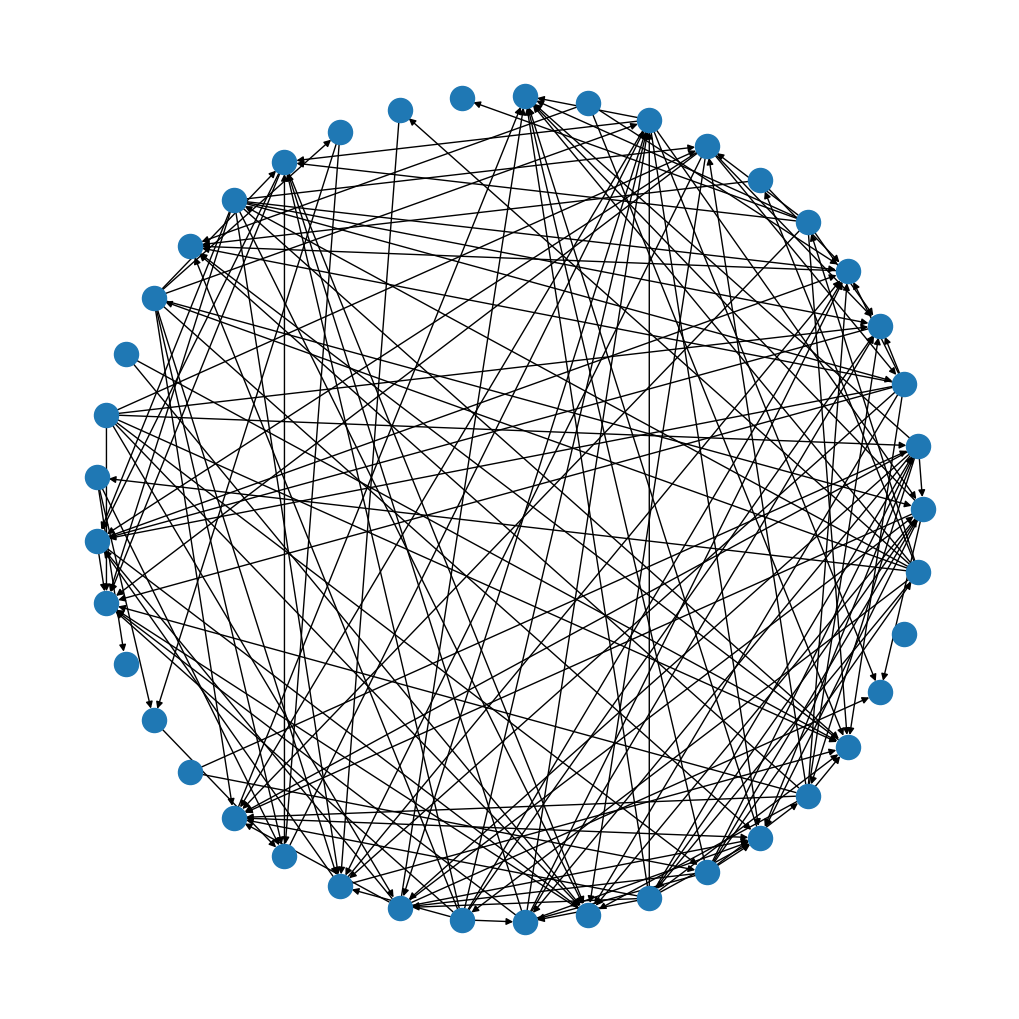

TypeError: unhashable type: 'list'

In [2]:
for itr in [0, 5, 10, 15, 20, 25, 32]:

    analyse_graphs.plot_whole_graph(data_mode[itr]['nodes'], data_mode[itr]['edges']+data_mode[itr]['cross unit'])
    analyse_graphs.plot_whole_graph(cluster_mode[itr]['nodes'], cluster_mode[itr]['edges']+cluster_mode[itr]['cross unit'])
    analyse_graphs.plot_whole_graph(compile_kn_data_mode[itr]['nodes'], compile_kn_data_mode[itr]['edges']+compile_kn_data_mode[itr]['cross unit'])
    analyse_graphs.plot_whole_graph(compile_kn_cluster_mode[itr]['nodes'], compile_kn_cluster_mode[itr]['edges']+compile_kn_cluster_mode[itr]['cross unit'])

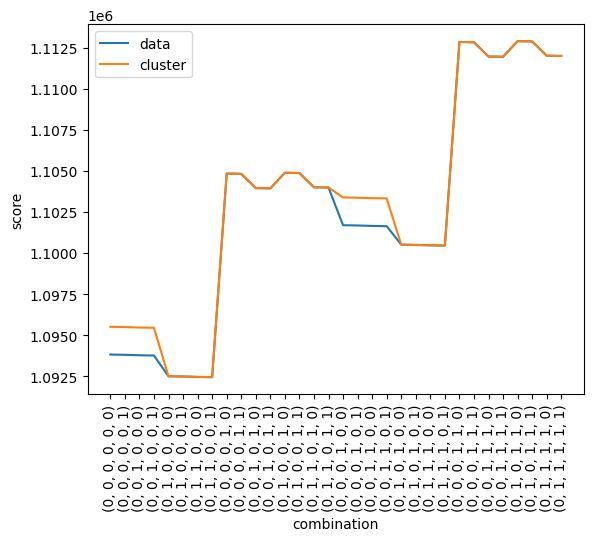

In [ ]:
analyse_graphs.compare_cul_modes(modes)
